<a href="https://colab.research.google.com/github/luisArthurRodriguesDaSilva/trabalho-UERJ-analise-de-dados/blob/main/experimento_queda_livre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [14]:
watchTimes = [
    0.43,0.44,0.35,0.70,0.50,0.58,0.70,0.34,0.32,0.32,0.52,0.82,
    0.63,0.48,0.28,0.48,0.65,0.51,0.65,0.49,0.45,0.34,0.11,0.57,
    0.34,0.39,0.54,0.44,0.41,0.32,0.32,0.54,0.50,0.61,0.57,0.40,
    0.55,0.34,0.45,0.33,0.34,0.58,0.57,0.49,0.47,0.52,0.46,0.48,
    0.49,0.54,0.53,0.50,0.50,0.34,0.42,0.43,0.30,0.38,0.37,0.43   
]

sensorTimes = [
    0.403,0.400,0.398,0.409,0.403,0.393,0.391,0.407,0.394,0.404,
    0.393,0.406,0.343,0.350,0.417,0.406,0.399,0.392,0.399,0.403,0.413,0.419,
    0.400,0.398,0.403,0.411,0.410,0.346,0.416,0.400,0.412,0.410,0.394,
    0.394,0.328,0.350,0.410,0.361,0.394,0.401,0.415,0.427,0.423,0.418,0.419,0.418,0.420,0.425,
    0.421,0.422,0.422,0.442,0.421,0.423,0.423,0.424,0.420,0.423,0.427,0.421]
print(len(watchTimes))
print(len(sensorTimes))

60
60


In [15]:
df = pd.DataFrame(np.c_[watchTimes,sensorTimes], columns=['na mão','na maquina'])

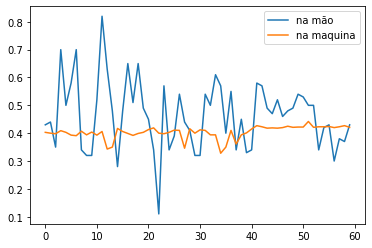

In [16]:
df.plot()